In [82]:
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup
import requests
import datetime as dt
from concurrent.futures import ThreadPoolExecutor
import itertools
import numpy as np

In [2]:
html = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = BeautifulSoup(html.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
stock_data = pd.read_html(str(table))[0]
names = [name.replace(".", "-") for name in stock_data.Symbol]
name_query = " ".join(names)
delta_t = pd.tseries.offsets.BusinessDay(n = 21)
end_date = dt.date.today()
start_date = end_date - delta_t

In [3]:
px = yf.download(name_query, period = '1y')

[*********************100%***********************]  503 of 503 completed


In [4]:
tickers = yf.Tickers(name_query)

In [5]:
tick = yf.Ticker('AAPL')

Add in name as column for each of the below

In [6]:
tick.analyst_price_target.T.columns

Index(['targetLowPrice', 'currentPrice', 'targetMeanPrice', 'targetHighPrice',
       'numberOfAnalystOpinions'],
      dtype='object')

In [7]:
tick = tickers.tickers['AAPL']

In [8]:
def esg_retrieve(name, thread_loop, tickers):

    try:

        tick = tickers.tickers[name]
        t_sus = tick.sustainability.loc[['percentile', 'totalEsg']].T.values[0]

        thread_loop.extend([t_sus])
    
    except:
        
        thread_loop.extend([[0,0]])

In [9]:
thread_count = 25
name_count = 25

thread_loop = []

with ThreadPoolExecutor(thread_count) as executor:
    futures = [executor.submit(esg_retrieve, name, thread_loop, tickers) for name in names[:name_count]]
    

In [10]:
pd.DataFrame(thread_loop)

,0,1
0,76.36,34.15
1,38.44,23.59
2,0.00,0.00
3,31.72,21.87
4,24.28,19.63
5,9.72,14.78
6,2.21,9.71
7,40.93,24.20
8,0.00,0.00
9,74.68,33.61


In [11]:
def analyst_retrieve(name, thread_loop, tickers):

    try:

        tick = tickers.tickers[name]
        t_sus = tick.analyst_price_target.T.values[0]

        thread_loop.extend([t_sus])
    
    except:
        
        thread_loop.extend([[0,0,0,0,0]])

In [12]:
thread_count = 25
name_count = 25

thread_loop = []

analyst_cols = ['targetLowPrice', 'currentPrice', 'targetMeanPrice', 'targetHighPrice',
       'numberOfAnalystOpinions']

with ThreadPoolExecutor(thread_count) as executor:
    futures = [executor.submit(analyst_retrieve, name, thread_loop, tickers) for name in names[:name_count]]
    

df_analysts = pd.DataFrame(thread_loop, columns = analyst_cols)

In [13]:
df_analysts

,targetLowPrice,currentPrice,targetMeanPrice,targetHighPrice,numberOfAnalystOpinions
0,110.0,120.65,129.01,210.0,17.0
1,135.0,149.59,162.59,200.0,24.0
2,245.0,280.47,313.45,375.0,22.0
3,115.0,99.28,132.15,160.0,10.0
4,90.0,112.82,117.32,144.0,22.0
5,95.0,111.30,111.92,130.0,13.0
6,90.0,84.75,102.83,117.0,12.0
7,280.0,304.40,331.52,394.0,23.0
8,73.0,88.13,100.76,137.0,16.0
9,141.0,157.04,177.18,220.0,11.0


In [40]:
tick = tickers.tickers['AAPL'].recommendations_summary

In [49]:
tick

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2023-01-04 12:30:00,Wedbush,Outperform,,main
2023-01-11 11:56:45,Barclays,Equal-Weight,,main
2023-01-13 14:18:55,Rosenblatt,Buy,,main


In [45]:
tick['To Grade'].unique()

array(['Buy', 'Outperform', 'Overweight', 'Sector Perform', 'Neutral',
       'Sector Outperform', 'Hold', 'Market Perform', '', 'Strong Buy',
       'Long-term Buy', 'Sell', 'Market Outperform', 'Positive',
       'Long-Term Buy', 'Equal-weight', 'Equal-Weight', 'Perform',
       'Negative', 'Reduce', 'Underweight', 'Underperform',
       'Sector Weight', 'Peer Perform'], dtype=object)

In [46]:
buy_list = ['Buy', 'Outperform', 'Overweight', 'Sector Outperform', 'Strong Buy', 
            'Long-term Buy', 'Market Outperform', 'Positive', 'Long-Term Buy']

neutral_list = ['Sector Perform', 'Neutral', 'Hold', 'Market Perform', 'Equal-weight', 
                'Equal-Weight', 'Perform', 'Sector Weight', 'Peer Perform']

sell_list = ['Sell', 'Negative', 'Reduce', 'Underweight', 'Underperform']


recommendation_key = {'Buy': buy_list, 'Neutral': neutral_list, 'Sell': sell_list}

In [50]:
dropped_recommendations = tick.drop_duplicates(keep = 'last')

In [83]:
def lambda_func(value):
    
    try:
        recommendation = [reco for reco, reco_list in recommendation_key.items() if value in reco_list][0]
        
    except:
        recommendation = np.nan
    
    return recommendation

In [101]:
pd.DataFrame(dropped_recommendations['To Grade'].apply(lambda x: lambda_func(x))).reset_index(0).groupby('To Grade').count()

,Date
To Grade,
Buy,187
Neutral,83
Sell,12


In [71]:
dropped_recommendations.last('365d').apply(lambda x: lambda_func(x['To Grade']), axis = 0)

KeyError: 'To Grade'

In [54]:
for analyst in 
[name for name, seq in recommendation_key.items() if 'Buy' in seq] 


SyntaxError: invalid syntax (2448156241.py, line 1)

In [53]:
names

[['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Buy'],


<AxesSubplot: xlabel='Date'>

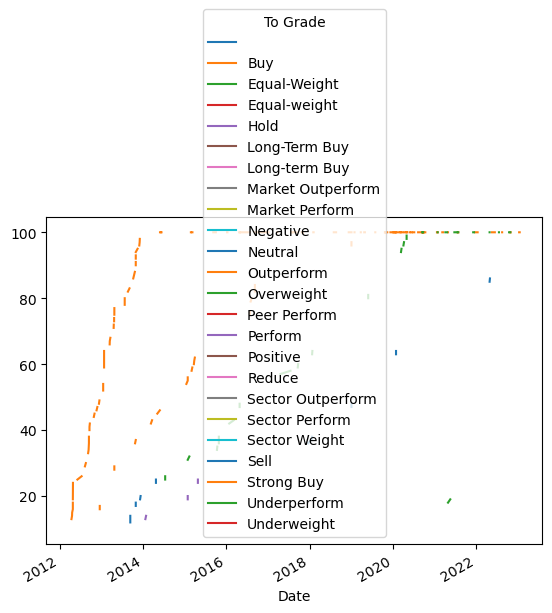

In [42]:
tick.groupby('To Grade').rolling(100, min_periods = 10).count()['Firm'].unstack(0).plot()

In [43]:
tick.rolling(10).drop_duplicates()

AttributeError: 'Rolling' object has no attribute 'drop_duplicates'